# Exploratory Data Analysis on Movies Data for an OTT Platform
 
<b>*Business Problem*</b> - Analyze the data and generate insights that could help a large OTT Platform in deciding which type of shows/movies to produce and how they can grow the business in different countries.
    
<b>*More Details*</b> - Given data is from a big player in the OTT industry that needs help analysing their data and generating insights that would potentially be helpful at a later point when building or modidying their recommneder system. The goal of this exercise is to thoroughly analyse the shared movies data share, understand the data, extract key insights, create new features that could be useful from the POV of recommendending users the right movies and finally - to get the data in a clean format.

## Data Dictionary

* <b>Show_id</b>: Unique ID for every Movie / Tv Show
* <b>Type</b>: Identifier - A Movie or TV Show
* <b>Title</b>: Title of the Movie / Tv Show
* <b>Director</b>: Director of the Movie
* <b>Cast</b>: Actors involved in the movie/show
* <b>Country</b>: Country where the movie/show was produced
* <b>Date_added</b>: Date it was added on the OTT Platform
* <b>Release_year</b>: Actual Release year of the movie/show
* <b>Rating</b>: TV Rating of the movie/show
* <b>Duration</b>: Total Duration - in minutes or number of seasons
* <b>Listed_in</b>: Genre
* <b>Description</b>: The summary description

# Approach Overview

The scope of the case study limited to extract actionable insigts from the POV of building/modifying a recommender engine. The notebook would comprise of the following steps - 
1. Get a high level understanding of the movies dataset (with some univariate analysis)
2. In-Depth Exploratory Data Analysis (EDA)
3. Data Cleaning / Pre-Processing (If needed)
4. Summary of the analysis and Recommendation to the business

In [395]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from wordcloud import WordCloud, STOPWORDS

sns.set_style("darkgrid")

In [2]:
# Reading in the data

df = pd.read_csv('movies_data.csv')

## High level Overview of the data (exploring individual columns)

In [3]:
# First look at the data

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info() # Below output suggests nulls in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Exploring the nulls in the data
# The below code outputs Percentage of missing data per column

np.round(df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100, 2)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
description      0.00
listed_in        0.00
release_year     0.00
title            0.00
type             0.00
show_id          0.00
dtype: float64

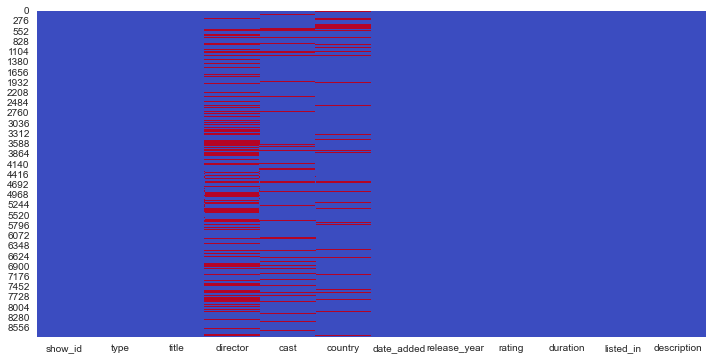

In [7]:
# Plotting a heatmap to see the spread of the missing data

plt.figure(figsize=(12,6))

sns.heatmap(df.isna(), cbar=False, cmap='coolwarm')
plt.show()

#### Observations:
* The dataset has 8,807 rows and 12 total columns - most being categorical. "date_added" and "release_year" are timestamp columns and it would make sense to convert them to datetime columns
* At first glance, it is quite evident from the output from info that there is missing data that would have to be explored and dealt with later on
* The above heatmap shows the extent of missing data in the director (~ 30%), cast (~ 9.5%) and country (~ 9.5%) columns. While the cast and country columns have less than 10% missing data, the director column has quite a lot of missing information
* One thing to note is that the missing data is evenly spread out across the dataset for the three columns

In [8]:
# Since the release year only contains the years of release, we don't really have to transform it
# On the other hand, date_added column can be converted to a pandas datetime column

df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
df['date_added'].head() # Printing the updated datetime column

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [10]:
# Checking the range of content that we have

df['date_added'].describe()

count                    8797
unique                   1714
top       2020-01-01 00:00:00
freq                      110
first     2008-01-01 00:00:00
last      2021-09-25 00:00:00
Name: date_added, dtype: object

In [11]:
# Treating release year as numerical quanity jsut for analysis

df['release_year'].describe() 

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# Finding out the oldest movies based on the release_year

df.sort_values(by='release_year')[['title','type','release_year','date_added']].head()

,title,type,release_year,date_added
4250,Pioneers: First Women Filmmakers*,TV Show,1925,2018-12-30
7790,Prelude to War,Movie,1942,2017-03-31
8205,The Battle of Midway,Movie,1942,2017-03-31
8660,Undercover: How to Operate Behind Enemy Lines,Movie,1943,2017-03-31
8739,Why We Fight: The Battle of Russia,Movie,1943,2017-03-31


In [14]:
# Finding out the movies/shows that were first added to the platform

df.sort_values(by='date_added')[['title','type','release_year','date_added']].head()

,title,type,release_year,date_added
5957,To and From New York,Movie,2006,2008-01-01
6611,Dinner for Five,TV Show,2007,2008-02-04
5956,Just Another Love Story,Movie,2007,2009-05-05
5955,Splatter,Movie,2009,2009-11-18
7370,Mad Ron's Prevues from Hell,Movie,1987,2010-11-01


#### Observations
* We can see that the OTT Platform has movies/shows ranging from the year 1925, all the way till 2021 based on the release_year column!
* The date_added column tells us that the first show/movie was added to the platform back in 2008 and that the latest available movie was added in Sept-2021
* It is fascinating to know that the oldest content on the platform from 1925 is actually a TV show and not a movie!
* The first movie that was released on the platform was "To and From New York", released back in 2008!

#### Exploring the "show_id" column

In [15]:
# Exploring the 'show_id' column

df['show_id'].head()

0    s1
1    s2
2    s3
3    s4
4    s5
Name: show_id, dtype: object

In [16]:
# Printing unique show ids
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [17]:
# Checking if the ids are all unique

# Based on below results, show_id is indeed unique
df['show_id'].value_counts() 

s7086    1
s5925    1
s4552    1
s1624    1
s1595    1
        ..
s6441    1
s1098    1
s4981    1
s4523    1
s481     1
Name: show_id, Length: 8807, dtype: int64

#### Observation(s)
* The show_id column has all unique values that serve as unique identifiers in the dataset

#### Exploring the "type" column

In [18]:
# Exploring the type column

df['type'].head()

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

In [19]:
# Checking unique values

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [20]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

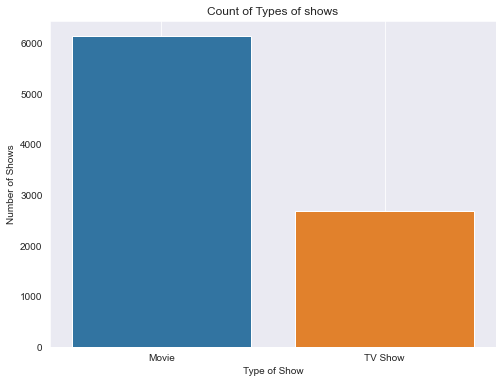

In [21]:
plt.figure(figsize=(8,6))

sns.countplot(x='type', data=df)
plt.title('Count of Types of shows')
plt.ylabel('Number of Shows')
plt.xlabel('Type of Show')
plt.grid()
plt.show()

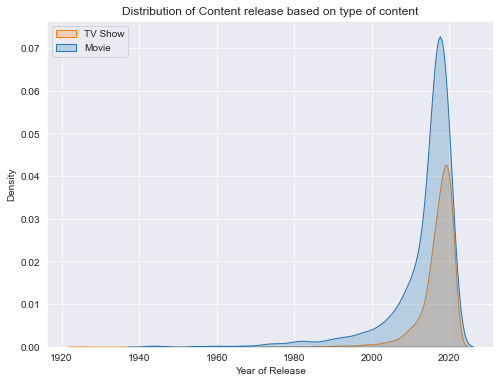

In [22]:
plt.figure(figsize=(8,6))

sns.kdeplot(x='release_year', data=df, hue='type',shade=True)
plt.title('Distribution of Content release based on type of content')
plt.xlabel('Year of Release')
plt.legend(['TV Show','Movie'], loc='upper left')
plt.show()

#### Observation(s)
* Based on above analysis, we can see that the OTT platform has categorized its content into Movies and TV Shows
* Another thing to notice here is that the # of movies is roughly 2.3x as compared to the # of TV Shows
* It can also be seen that TV shows became more popular recently as compared to movies that have been around all the way since 1980s. This could explain why there are more movies than TV shows
* There could be other facors as well such as direction cost for TV shows because of which there are lesser number of TV shows as compared to movies

#### Exploring the column "title"

In [23]:
df['title'].head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [24]:
# Below output lines up with the distinct count of show_id as show_id should have a one-to-one mapping with the title

df['title'].nunique()

8807

In [25]:
# Looking at the latest titles

df.sort_values(by='date_added', ascending=False)[['title','date_added','description']].head(10)

,title,date_added,description
0,Dick Johnson Is Dead,2021-09-25,"As her father nears the end of his life, filmm..."
6,My Little Pony: A New Generation,2021-09-24,Equestria's divided. But a bright-eyed hero be...
10,"Vendetta: Truth, Lies and The Mafia",2021-09-24,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
9,The Starling,2021-09-24,A woman adjusting to life after a loss contend...
8,The Great British Baking Show,2021-09-24,A talented batch of amateur bakers face off in...
7,Sankofa,2021-09-24,"On a photo shoot in Ghana, an American model s..."
1,Blood & Water,2021-09-24,"After crossing paths at a party, a Cape Town t..."
5,Midnight Mass,2021-09-24,The arrival of a charismatic young priest brin...
3,Jailbirds New Orleans,2021-09-24,"Feuds, flirtations and toilet talk go down amo..."
2,Ganglands,2021-09-24,To protect his family from a powerful drug lor...


#### Exploring the "director column"

In [26]:
df['director'].head()

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [27]:
# Number of unique direcors

df['director'].nunique()

4528

In [28]:
df['director'].value_counts()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
                          ..
Roy Campanella II          1
Doug Lefler                1
Rebecca Addelman           1
Prateek Vats               1
Pailin Wedel               1
Name: director, Length: 4528, dtype: int64

In [29]:
# Looking at the work of the director with the most number of movies/shows

# Based on below output, Rajiv seems to be the director for the famous indian children show - Chhota Bheem

df[df['director'] == 'Rajiv Chilaka'][['title','rating','listed_in']]

,title,rating,listed_in
406,Chhota Bheem - Neeli Pahaadi,TV-Y7,Children & Family Movies
407,Chhota Bheem & Ganesh,TV-Y7,Children & Family Movies
408,Chhota Bheem & Krishna: Mayanagari,TV-Y7,Children & Family Movies
409,Chhota Bheem & Krishna: Pataliputra- City of t...,TV-Y7,Children & Family Movies
410,Chhota Bheem And The Broken Amulet,TV-Y7,Children & Family Movies
411,Chhota Bheem And The Crown of Valhalla,TV-Y7,Children & Family Movies
412,Chhota Bheem and the Incan Adventure,TV-Y7,Children & Family Movies
413,Chhota Bheem and The ShiNobi Secret,TV-Y7,Children & Family Movies
414,Chhota Bheem Aur Hanuman,TV-Y7,Children & Family Movies
415,Chhota Bheem aur Krishna,TV-Y7,Children & Family Movies


In [30]:
# Looking at another Indian director

# Looking at this, it looks like Suhas is the director for another popular Indian show for kids - Motu Patlu

df[df['director'] == 'Suhas Kadav'][['title','rating','listed_in']]

,title,rating,listed_in
937,Motu Patlu in Dragon's World,TV-Y7,"Children & Family Movies, Comedies"
938,Motu Patlu in the Game of Zones,TV-Y7,"Children & Family Movies, Comedies, Music & Mu..."
939,Motu Patlu in Wonderland,TV-Y7,"Children & Family Movies, Music & Musicals"
940,Motu Patlu: Deep Sea Adventure,TV-Y7,"Children & Family Movies, Comedies"
941,Motu Patlu: Mission Moon,TV-Y7,"Children & Family Movies, Comedies"
1006,Motu Patlu Dino Invasion,TV-Y7,"Children & Family Movies, Comedies"
1007,Motu Patlu in Octupus World,TV-Y,"Children & Family Movies, Comedies"
1008,Motu Patlu VS Robo Kids,TV-Y,Children & Family Movies
1071,Motu Patlu in Hong Kong: Kung Fu Kings 3,TV-Y7,"Children & Family Movies, Music & Musicals"
1072,Motu Patlu in the City of Gold,TV-Y7,"Children & Family Movies, Comedies, Music & Mu..."


In [31]:
# We also know that the director column has quite a lot of null values (~ 30%)
# We can analyse the same to see if there could be some reasom behind the missing data

df['director'].isna().sum()

2634

<b> Q) </b> *Does the type of content have an impact on whether the value in director is missing or not?* 

In [32]:
# Getting data where director data is missing

missing_directors = df[df['director'].isna()].copy()

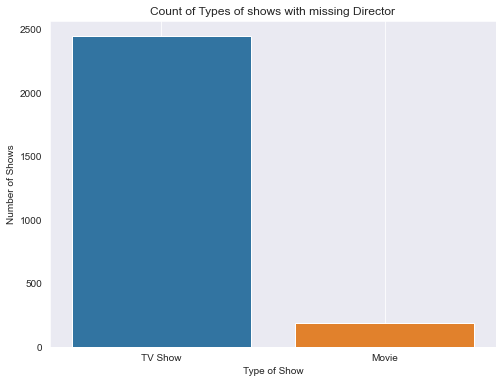

In [33]:
plt.figure(figsize=(8,6))

sns.countplot(x='type', data=missing_directors)
plt.title('Count of Types of shows with missing Director')
plt.ylabel('Number of Shows')
plt.xlabel('Type of Show')
plt.grid()
plt.show()

In [34]:
# Checking missing data based on the type of content

missing_directors['type'].value_counts()

TV Show    2446
Movie       188
Name: type, dtype: int64

* Above analysis shows that TV Shows have a 13x chance of having missing info for directors as compared to Movies

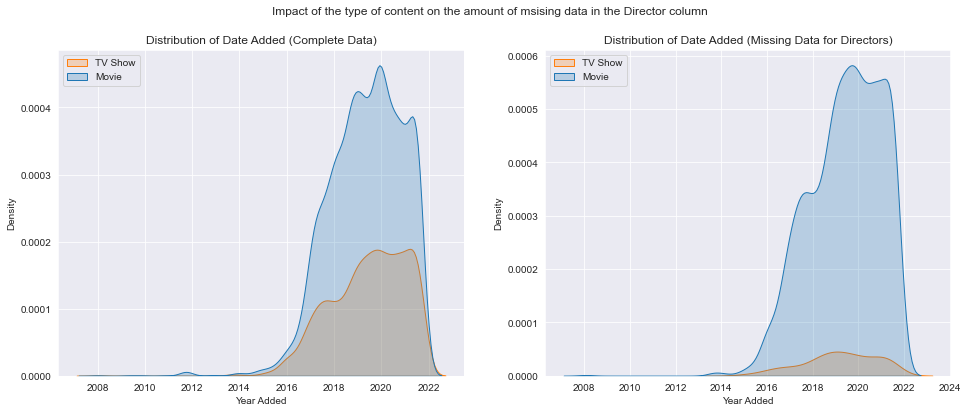

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.kdeplot(x='date_added', data=df, hue='type',shade=True, ax=ax1)
ax1.set_title('Distribution of Date Added (Complete Data)')
ax1.set_xlabel('Year Added')
ax1.legend(['TV Show','Movie'], loc='upper left')

sns.kdeplot(x='date_added', data=missing_directors, hue='type',shade=True, ax=ax2)
ax2.set_title('Distribution of Date Added (Missing Data for Directors)')
ax2.set_xlabel('Year Added')
ax2.legend(['TV Show','Movie'], loc='upper left')

plt.suptitle('Impact of the type of content on the amount of msising data in the Director column')
plt.show()

#### Observations
* Based on the above analysis, we can conclude that the data for directors may not be missing completely at random as we were able to find one such factor - that is the type of content which could potentially have an impact on whether the director column is blank or not
* Because of the way how the data for this column is missing (in large quantity), and also that it is not really missing at random, we could even add a feature that tells us if the director name is missing or not

#### Exploring the "cast" column

In [36]:
# Printing out some non-null examples

df[df['cast'].notna()]['cast'].head(10)

1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
Name: cast, dtype: object

In [37]:
# As per below example, cast stores strings that have each cast separated with a comma

print(df['cast'].loc[1])

Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng


In [38]:
# Getting lenght of casts for non-null cases

cast_len = pd.Series(df[df['cast'].notna()]['cast'].apply(lambda cast: len(cast.split(','))))

cast_len

1       19
2        9
4        8
5       16
6       10
        ..
8801     6
8802    10
8804     7
8805     9
8806     8
Name: cast, Length: 7982, dtype: int64

In [39]:
cast_len.describe()

count    7982.000000
mean        8.033826
std         4.476433
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        50.000000
Name: cast, dtype: float64

In [40]:
# Creating a dataframe where cost is not blank

cast_df = df[df['cast'].notna()].copy()

cast_df['cast_len'] = cast_len

In [41]:
cast_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,10


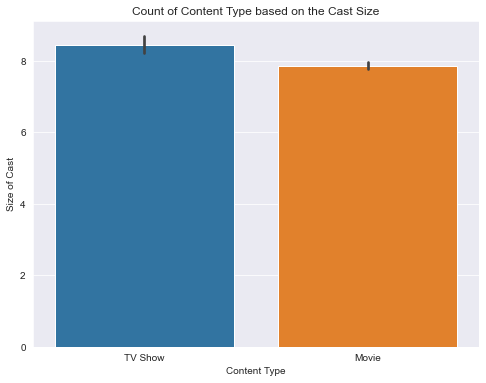

In [42]:
# Exploring how the lenght of cast varies based on the type of content

plt.figure(figsize=(8,6))

sns.barplot(x='type',y='cast_len',data=cast_df)
plt.title('Count of Content Type based on the Cast Size')
plt.xlabel('Content Type')
plt.ylabel('Size of Cast')
plt.show()

In [43]:
# Adding cast_len to the original dataframe

df['cast_len'] = df['cast'].dropna().apply(lambda x: len(x.split(',')))

In [44]:
# Cast has some missing values too (~ 9.5%)
# It would be nice to run a quick analysis on these

cast_nulls = df[df['cast'].isna()].copy()

In [45]:
# Checking if the type of content impacts missing values for cast

cast_nulls['type'].value_counts()

Movie      475
TV Show    350
Name: type, dtype: int64

<b>Q)<b> *Does the Content Rating have some relation with the average cast size?*

In [46]:
# Getting the mean cast size based on the rating of content

rating_cast_len_df = df.groupby(by='rating')['cast_len'].mean().reset_index().sort_values(by='cast_len', ascending=False)

rating_cast_len_df

,rating,cast_len
3,G,10.650000
7,PG-13,10.056604
6,PG,9.974910
4,NC-17,9.666667
8,R,9.582278
14,TV-Y7,8.716129
16,UR,8.333333
11,TV-MA,7.826449
9,TV-14,7.682864
5,NR,7.333333


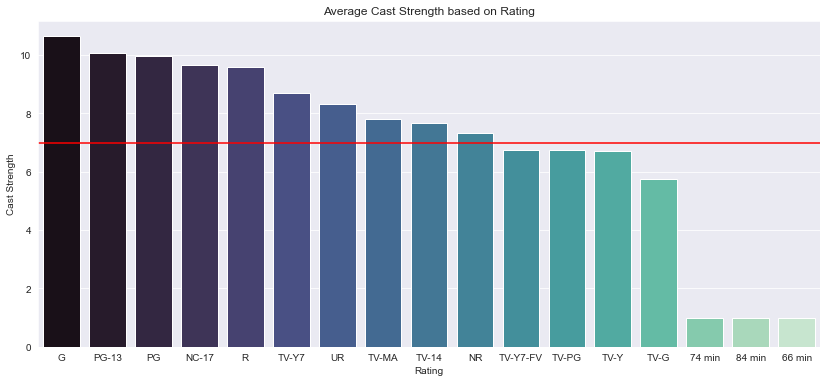

In [47]:
# Red line in below chart represents the mean cast length

plt.figure(figsize=(14,6))

sns.barplot(x='rating',y='cast_len',data=rating_cast_len_df, palette='mako')
plt.axhline(y=rating_cast_len_df['cast_len'].mean(), color='r') 
plt.title('Average Cast Strength based on Rating')
plt.xlabel('Rating')
plt.ylabel('Cast Strength')
plt.show()

#### Observations
* Cast names are stored as strings that are comma separated
* On average, for non-null cases, average cast is 8, min is 1 and max 50
* The content type does not have any impact on the size of the cast
* Added Cast length to the original data
* Based on a short analysis, the cast column might be completely missing at random
* Certain ratings such as 74 min, 84 min and 66 min have only a single cast (probably the person that made the content)

#### Exploring the "country" column

In [48]:
df['country'].head()

0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: object

In [49]:
# Checking the unique countries

df['country'].nunique()

748

There are 748 unique countries - This seems odd as there are only 195 countries in the world. This would be something that should be explored

In [50]:
df['country'].value_counts()

United States                                          2818
India                                                   972
United Kingdom                                          419
Japan                                                   245
South Korea                                             199
                                                       ... 
Ireland, Canada, United Kingdom, United States            1
Switzerland, Vatican City, Italy, Germany, France         1
Romania, United Kingdom                                   1
Belgium, Ireland, Netherlands, Germany, Afghanistan       1
Norway, Denmark, Netherlands, Sweden                      1
Name: country, Length: 748, dtype: int64

* Looking at the above value counts, it is evidnent that some country values are comma separated, due to many countries being present. This could later be used to split the column into several columns

In [51]:
# Exploring the numbner of countries per movie

# Creating a new feature num_of_countries
df['num_of_countries'] = df['country'].dropna().apply(lambda country: len(country.split(',')))

In [52]:
df['num_of_countries'].describe()

count    7976.000000
mean        1.256143
std         0.698381
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: num_of_countries, dtype: float64

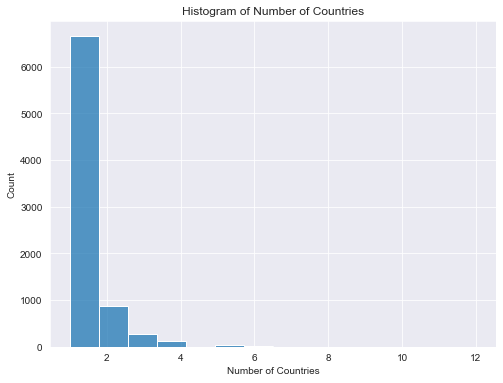

In [53]:
plt.figure(figsize=(8,6))

sns.histplot(data=df,x='num_of_countries')
plt.title('Histogram of Number of Countries')
plt.xlabel('Number of Countries')
plt.show()

In [54]:
df['num_of_countries'].value_counts()

1.0     6656
2.0      873
3.0      273
4.0      114
5.0       37
6.0       14
7.0        5
8.0        2
10.0       1
12.0       1
Name: num_of_countries, dtype: int64

* We can see that the number of countries in most cases is 1

<b>Q)</b> *Are the nulls in the country column due to some factor?* 

In [55]:
# Exploring why there are nulls in the country column

df['country'].isna().sum()

831

In [56]:
country_na = df[df['country'].isna()].copy()

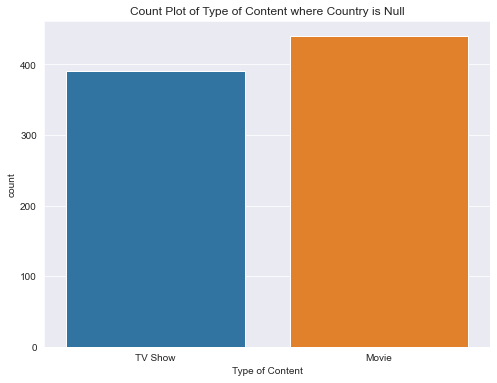

In [57]:
plt.figure(figsize=(8,6))

sns.countplot(x='type',data=country_na)
plt.title('Count Plot of Type of Content where Country is Null')
plt.xlabel('Type of Content')
plt.show()

* Above chart shows no significant difference between the two types of content. This means that the type of content does not affect the country column being null

In [58]:
# Finally

# Making a list that would store all countries
unique_ctry_list = []

ctry_list = df['country'].dropna().apply(lambda country: country.split(','))

for i, item in ctry_list.iteritems():
    for ctry in item:
        unique_ctry_list.append(ctry)

In [59]:
unique_ctry_ser = pd.Series(unique_ctry_list)

unique_ctry_ser.value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Bangladesh          1
 Lithuania           1
 Sudan               1
 Kazakhstan          1
Somalia              1
Length: 197, dtype: int64

In [60]:
# Applying strip as there are some countries with leading or trailing spaces

unique_ctry_ser = unique_ctry_ser.apply(str.strip)

In [61]:
unique_ctry_ser.nunique()

123

* We see that there are 123 total countries in the dataset

#### Observations
* There is no real-evident factor as to why there are missing values in the country column
* Country column is in the form of string having countries as comma separated values. This could later be used to add a column for each country in the dataset
* There are a total of 123 countries in the dataset
* Most movies/tv-shows have a single country listed against them. The highest is 12.

#### Exploring the rating column

In [62]:
df['rating'].head()

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object

In [63]:
df['rating'].nunique()

17

<b>Q)</b> *What does the count of different ratings look like in the Rating column?*

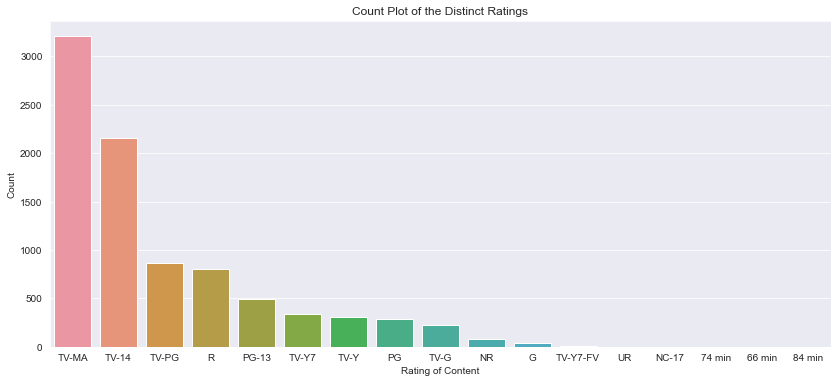

In [64]:
plt.figure(figsize=(14,6))

sns.countplot(x='rating',data=df, order=df['rating'].value_counts().index)
plt.xlabel('Rating of Content')
plt.ylabel('Count')
plt.title('Count Plot of the Distinct Ratings')
plt.show()

In [65]:
# Looking at percentage distribution of the ratings across our data

ratings_perc_values = np.round(df['rating'].value_counts() / df.shape[0] * 100, 2)

ratings_perc_values

TV-MA       36.41
TV-14       24.53
TV-PG        9.80
R            9.07
PG-13        5.56
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
UR           0.03
NC-17        0.03
74 min       0.01
66 min       0.01
84 min       0.01
Name: rating, dtype: float64

* We can see that there are a lot of sub-categories in the Rating column. However, what is important here is that several categories occur too few times.
* Out of the 17 categories, 9 categories occur in less than 3% cases in our dataset! <br> We can assign everything that occurs less than 3% times in the data as "other"

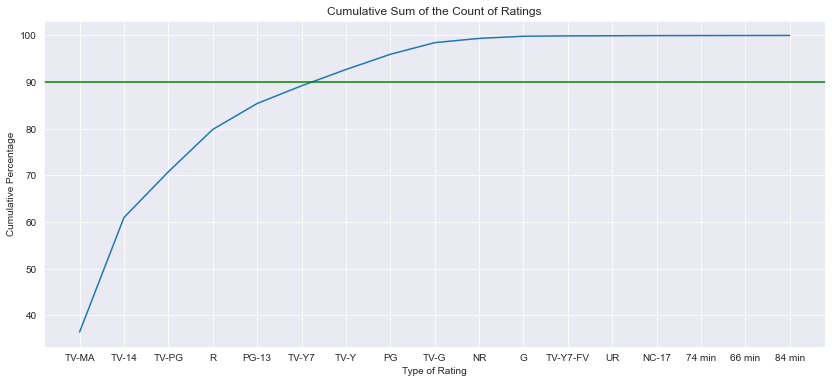

In [66]:
plt.figure(figsize=(14,6))

sns.lineplot(y=np.cumsum(ratings_perc_values.values), x=ratings_perc_values.index)
plt.axhline(y=90, color='g') 
plt.xlabel('Type of Rating')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Sum of the Count of Ratings')
plt.show()

In [67]:
np.cumsum(ratings_perc_values.values)

array([36.41, 60.94, 70.74, 79.81, 85.37, 89.16, 92.65, 95.91, 98.41,
       99.32, 99.79, 99.86, 99.89, 99.92, 99.93, 99.94, 99.95])

* Based on the above graph, we can see that the first 8 categories i.e., TV-MA, TV-14, TV-PG, R and PG-13, TV-Y7, TV-Y and PG covers roughly 96% of all data

In [68]:
# Finding out all categories that occur less than 3% times

rare_rating_cats = ratings_perc_values[ratings_perc_values < 3].index.tolist()

rare_rating_cats

['TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17', '74 min', '66 min', '84 min']

In [69]:
# Updating the value of the rating wherever the minor categories occur

df.loc[df['rating'].isin(rare_rating_cats), 'rating'] = 'other'

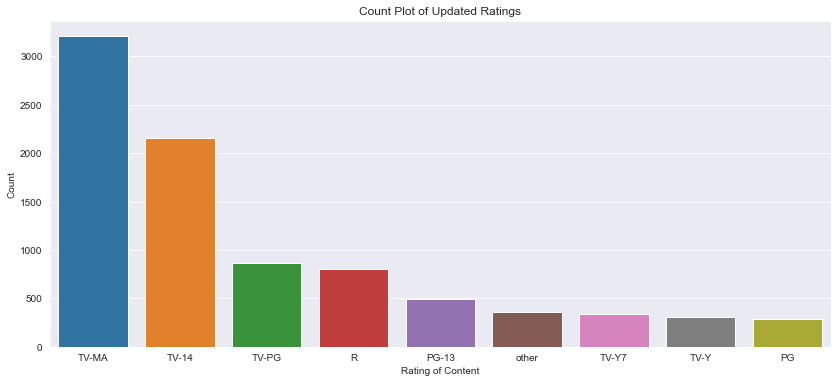

In [70]:
plt.figure(figsize=(14,6))

sns.countplot(x='rating',data=df, order=df['rating'].value_counts().index)
plt.xlabel('Rating of Content')
plt.ylabel('Count')
plt.title('Count Plot of Updated Ratings')
plt.show()

In [71]:
# Printing updated percentage values for the categories in rating

np.round(df['rating'].value_counts() / df.shape[0] * 100, 2)

TV-MA    36.41
TV-14    24.53
TV-PG     9.80
R         9.07
PG-13     5.56
other     4.04
TV-Y7     3.79
TV-Y      3.49
PG        3.26
Name: rating, dtype: float64

* We can see that now the categories are distributed much better than before

#### Exploring the "duration" column

In [72]:
df['duration'].head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

* We can see right away that duration has both movie duration as well as tv-series lenght. It would make sense to create two new columns from this column that would have the movie length and tv-show length

In [73]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [74]:
# Addressing blank values

df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,other,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",1.0,1.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,other,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,1.0,1.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,other,NaN,Movies,The comic puts his trademark hilarious/thought...,1.0,1.0


In [75]:
# Temporarily filling in the blank values as '-1'

df['duration'] = df['duration'].fillna('-1')

In [76]:
# Extracting the movie length as well as series lenght from these columns

df['movie_len'] = df.loc[df['type'] == 'Movie', 'duration'].apply(lambda duration: duration.split(' ')[0])
df['series_len'] = df.loc[df['type'] == 'TV Show', 'duration'].apply(lambda duration: duration.split(' ')[0])

# Converting these values to float
df['movie_len'] = df['movie_len'].astype('float64')
df['series_len'] = df['series_len'].astype('float64')

In [77]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,NaN,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.0,1.0,NaN,2.0


<b> Q) </b> *Does the rating have an impact on the duration?* 

In [579]:
df['movie_len'].describe()

count    6131.000000
mean       99.570054
std        28.285507
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_len, dtype: float64

In [78]:
rating_movie_len = df.groupby(by='rating')['movie_len'].mean().sort_values(ascending=False).reset_index()

rating_movie_len

,rating,movie_len
0,TV-14,110.290820
1,PG-13,108.330612
2,R,106.720201
3,PG,98.282230
4,TV-MA,95.889913
5,TV-PG,94.851852
6,other,85.398438
7,TV-Y7,66.287770
8,TV-Y,48.114504


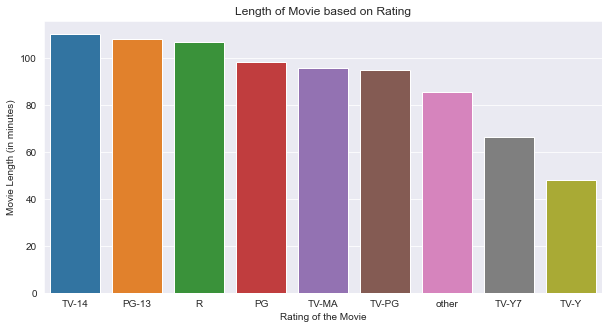

In [578]:
# Plotting the above results

plt.figure(figsize=(10,5))

sns.barplot(x=rating_movie_len['rating'], y=rating_movie_len['movie_len'])
plt.xlabel('Rating of the Movie')
plt.ylabel('Movie Length (in minutes)')
plt.title('Length of Movie based on Rating')
plt.show()

* Above plot tells use that the rating of the movie can give us a good indication of the average length of the movie. We can use this to impute the missing values for the movies we saw earlier that had missing duration

In [80]:
df.loc[df['movie_len'] == -1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,other,-1,Movies,"Louis C.K. muses on religion, eternal love, gi...",1.0,1.0,-1.0,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,other,-1,Movies,Emmy-winning comedy writer Louis C.K. brings h...,1.0,1.0,-1.0,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,other,-1,Movies,The comic puts his trademark hilarious/thought...,1.0,1.0,-1.0,NaN


In [81]:
# Imputing with the value for the other category

val_to_impute = df[df['rating'] == 'other'].mean()['movie_len'].round()
val_to_impute

85.0

In [82]:
df.loc[df['duration'] == '-1', 'movie_len'] =  val_to_impute
df.loc[df['duration'] == '-1', 'duration'] =  np.nan

In [83]:
# Looking at the example where 

df[df['show_id'].isin(['s5542','s5795','s5814'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,other,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",1.0,1.0,85.0,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,other,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,1.0,1.0,85.0,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,other,NaN,Movies,The comic puts his trademark hilarious/thought...,1.0,1.0,85.0,NaN


In [85]:
# Exploring TV Shows

df['series_len'].describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: series_len, dtype: float64

In [86]:
df[df['series_len'] == 17]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,15.0,1.0,NaN,17.0


* It looks like most TV Shows have a single season. However there's one show having over 17 seasons i.e., Grey's Anatomy!

#### Exploring "listed_in" column

In [88]:
df['listed_in'].head(10)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
6                             Children & Family Movies
7     Dramas, Independent Movies, International Movies
8                         British TV Shows, Reality TV
9                                     Comedies, Dramas
Name: listed_in, dtype: object

* This seems to contain the genres a show/movie is tagged to. At first glance, it is visible that this is a one to many mapping such that the listed_in column has strings containing comma-separated genre.

In [95]:
# Listing all unique genres in the dataset

genres = []

genres_list = df['listed_in'].str.split(',').tolist()

for genre in genres_list:
    for indv_genre in genre:
        genres.append(indv_genre)
        
genre_ser = pd.Series(genres)

In [101]:
# Looking at the unique genres

genre_ser.value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
Sports Movies                   1
LGBTQ Movies                    1
Length: 73, dtype: int64

* Looks like there are a total of 73 genres that are present in the dataset

#### Observations:
* Since this column is stored like a comma-separated string, we can explore expanding all of these to separate columns

#### Exploring the "description" column

In [107]:
df['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [123]:
def generate_wordcloud(ser):
    
    """
    Generate word-cloud based on input corpus.
    
    Taken code refrence from: https://www.geeksforgeeks.org/generating-word-cloud-python/
    """
 
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in ser:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

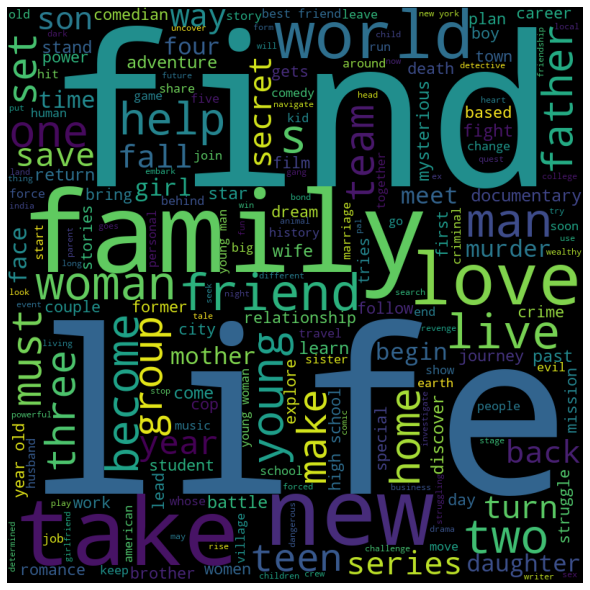

In [124]:
# Using a word cloud to see what kind of words are most-frequently used here in all data

generate_wordcloud(df['description'])

* The word-cloud gives us a high-level idea of what words occur the most in the description column. Words such as "find", "family", "love", "live", etc. occur quite a lot

<b>Q)</b> *Can the length of the description give us some information?*

In [136]:
# Adding a new feature to the dataset - length of the description

# Below code finds out the number of words in the description

df['desc_len'] = df['description'].str.split(' ').apply(lambda desc: len(desc))

df['desc_len']

0       27
1       27
2       27
3       24
4       24
        ..
8802    25
8803    20
8804    25
8805    26
8806    25
Name: desc_len, Length: 8807, dtype: int64

In [137]:
df['desc_len'].describe()

count    8807.000000
mean       23.881799
std         2.836445
min        10.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        48.000000
Name: desc_len, dtype: float64

* The description column tends to have 24 words on average, with the least being 10 and the most being 48

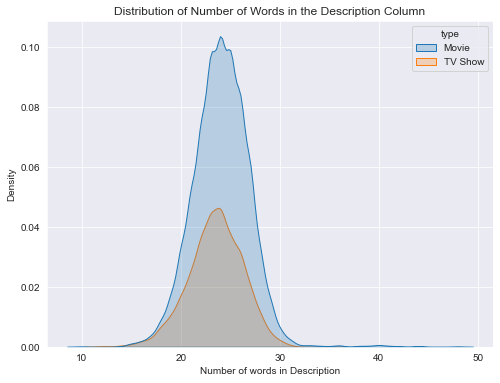

In [178]:
# Visualizing the distribution of the feature - desc_len

plt.figure(figsize=(8,6))

sns.kdeplot(x='desc_len',data=df, hue='type', shade=True)
plt.xlabel('Number of words in Description')
plt.title('Distribution of Number of Words in the Description Column')
plt.show()

* Looking at the above distribution, we can see that the Number of Words feature has a gaussian distribution that is centered around 24 (roughly)
* What's interesting to see (however predicable), is that both Movies as well as TV shows have a similar distribution centered around the same mean
* This could simply be due to the policy of the OTT around how long the description can be

#### Observations
* This wraps up the data study (mostly univariate so far) that has given quite a lot of insights into each and every column that is present in the dataset

## Exploratory Data Analysis continued (Bivariate/Multivariate + Gathering insights)
*Now that the dataset is well understood, we can move on with some advanced analysis between how different features interact*
<br>*Secondly, the focus can now be shifted over towards answering kew questions and deriving insights*

In [145]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len,desc_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN,27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,NaN,NaN,1.0,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,1.0,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.0,1.0,NaN,2.0,24


#### <b>Q)</b> *How has the number of movies released per year changed over the last 20-30 years?*
This question can be explored and answered in 2 part - 
1. Analysing over movies
2. Analysing over TV Shows

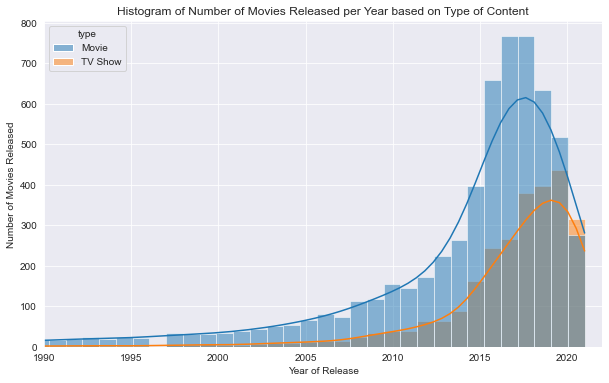

In [229]:
plt.figure(figsize=(10,6))

sns.histplot(x='release_year',data=df, hue='type', kde=True, bins=100)
plt.xlim(1990,2022)
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.title('Histogram of Number of Movies Released per Year based on Type of Content')
plt.show()

#### Take-Aways: 
Based on above plot, we have the following take-aways:
* We can see that from 1990s to roughly around 2010, movies were clearly dominant over TV Shows and this makes sense since back then there were not a lot of streaming options. Plus producing a TV Show can be really expensive as compared to a movie
* TV Shows have risen in popularity starting 2010 and peaked around 2018-19. Similarly, the release of movies peaked around 2016-17.
* Both release of Movies as well as TV Shows has seen a drastic increase in the last 15 years with movies still be the clear favorite and dominant content type
* What is interesting to see is that both Movies and TV Shows have seen a decline around the 2020 mark. This most likely is when Covid hit and all production went down. However what's interesting is that release of movies started falling slightly before TV shows
* It would have been interesting if the dataset contained data for 2021 and 2022 because this is when most OTT platforms boomed because of factors such as lockdown, work-from-home, etc.

#### <b>Q)</b> *Movies vs TV Shows based on when they were added to the Platform*<br>
1. Comparison of tv shows vs. movies. <br>
2. Does the platform has more focus on TV Shows than movies in recent years


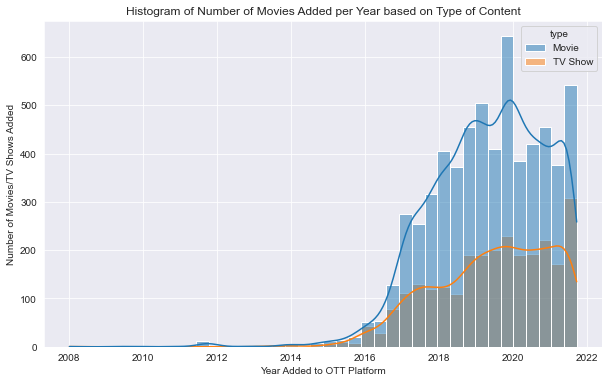

In [228]:
plt.figure(figsize=(10,6))

sns.histplot(x='date_added',data=df,hue='type',kde=True,bins=40)
plt.xlabel('Year Added to OTT Platform')
plt.ylabel('Number of Movies/TV Shows Added')
plt.title('Histogram of Number of Movies Added per Year based on Type of Content')
plt.show()

#### Take-Aways: 
Based on above plot, we have the following take-aways:
* We can see that both movies and TV Shows were rapidly added starting around 2015-16 period where the two content types have aggressively grown on the platform
* Its pretty evident that the OTT Platform has been prioritizing adding Movies over TV Shows, looking at the above chart
* Both types of content have seen a decline around the start of Covid

#### <b>Q)</b> *What is the best time to launch a TV show?*<br>
To answer this question, we can extract information like month, day of week, day of month, whether it was released on the weekend, etc. from the date_added column


In [230]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len,desc_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN,27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,NaN,NaN,1.0,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,1.0,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.0,1.0,NaN,2.0,24


In [266]:
# Extracting information from the date_added timestamp

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['day_added'] = df['date_added'].dt.day
df['day_of_week_added'] = df['date_added'].dt.day_name()
df['quarter_added'] = df['date_added'].dt.quarter

# Checking if the date_added falls on as weekend
df['is_weekend']= df['day_of_week_added'].apply(lambda day: 1 if day in ['Saturday','Sunday'] else 0)

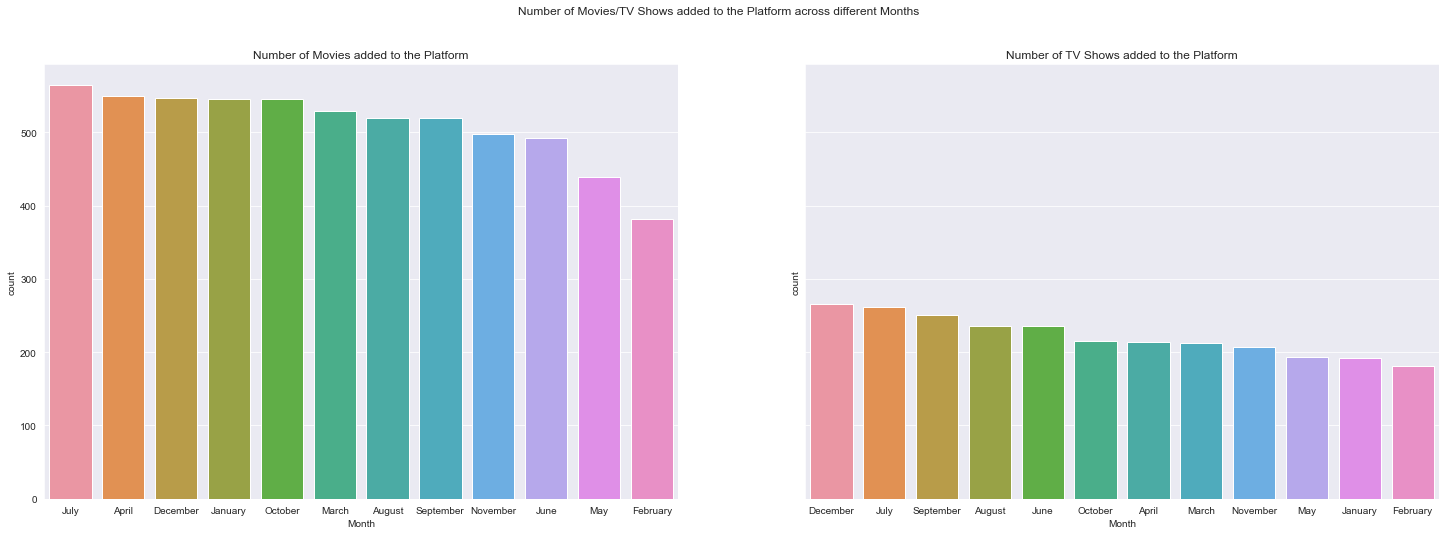

In [320]:
# Looking at the count of movies and shows released based on month

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(25,8))

#month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

sns.countplot(x='month_added',data=df[df['type']=='Movie'], ax=ax[0], order=df[df['type']=='Movie']['month_added'].value_counts().index)
ax[0].set_xlabel('Month')
ax[0].set_title('Number of Movies added to the Platform')

sns.countplot(x='month_added',data=df[df['type']=='TV Show'], ax=ax[1], order=df[df['type']=='TV Show']['month_added'].value_counts().index)
ax[1].set_xlabel('Month')
ax[1].set_title('Number of TV Shows added to the Platform')

plt.suptitle('Number of Movies/TV Shows added to the Platform across different Months')

plt.show()

* Above chart tells us that there are not significant differences across the months when it comes to adding movies and TV Shows to the platform

In [316]:
df['quarter_added'].value_counts()

3.0    2352
4.0    2278
2.0    2124
1.0    2043
Name: quarter_added, dtype: int64

* Across the 4 quarters there is no real difference

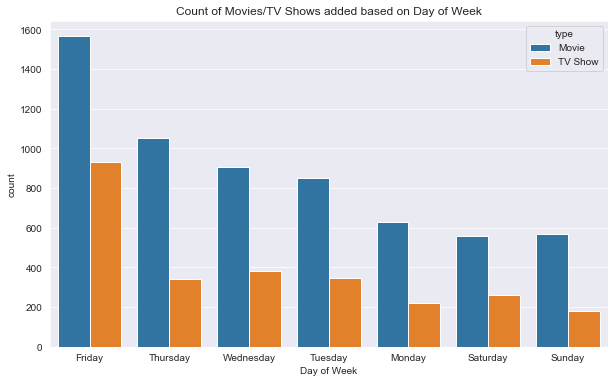

In [315]:
# Extending the above analysis to the day of the week

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='day_of_week_added', hue='type', order=df['day_of_week_added'].value_counts().index)
plt.xlabel('Day of Week')
plt.title('Count of Movies/TV Shows added based on Day of Week')
plt.show()

* We can see that clearly see that for both TV Shows as well as movies, Friday is usually the day when it is added to the platform

#### Take-Aways: 
Based on above analysis, we have the following take-aways:
* The month doesn't matter as much when it comes to how the platform releases the content.
* The quarter of the year is pretty uniform too.
* However, we can see that the day of the week gives us a lot of insights. Most movies and TV Shows are released on Fridays as per the chart. We also see another interesting thing that while the number of movies released per weekday decreased as we move away from Friday in the chart, it is a little different for TV shows. TV shows (apart from Fridays) seem to have a similar chance of being added on the other days
* We can say that its best to release a movie/show on a Friday

## Outlier Analysis
Outliers can be present across numerical as well as categorical fields. It is important to find outliers as part of pre-processing the data

In [330]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len,desc_len,year_added,month_added,day_added,quarter_added,day_of_week_added,is_weekend
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN,27,2021.0,September,25.0,3.0,Saturday,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,NaN,NaN,1.0,27,2021.0,September,24.0,3.0,Friday,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,1.0,24,2021.0,September,24.0,3.0,Friday,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.0,1.0,NaN,2.0,24,2021.0,September,24.0,3.0,Friday,0


In [327]:
# Describing the numerical fields

df[['cast_len','num_of_countries','movie_len','series_len','desc_len']].describe()

,cast_len,num_of_countries,movie_len,series_len,desc_len
count,7982.000000,7976.000000,6131.000000,2676.000000,8807.000000
mean,8.033826,1.256143,99.570054,1.764948,23.881799
std,4.476433,0.698381,28.285507,1.582752,2.836445
min,1.000000,1.000000,3.000000,1.000000,10.000000
25%,6.000000,1.000000,87.000000,1.000000,22.000000
50%,8.000000,1.000000,98.000000,1.000000,24.000000
75%,10.000000,1.000000,114.000000,2.000000,26.000000
max,50.000000,12.000000,312.000000,17.000000,48.000000


In [352]:
def plot_boxplot(df, x=None, y=None):
    
    if x!=None and y!=None:
    
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df, x=x, y=y)
        plt.title(f"Boxplot of {y} based on {x}")
        plt.show()
    else:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df, x=x)
        plt.title(f"Boxplot of {x}")
        plt.show()

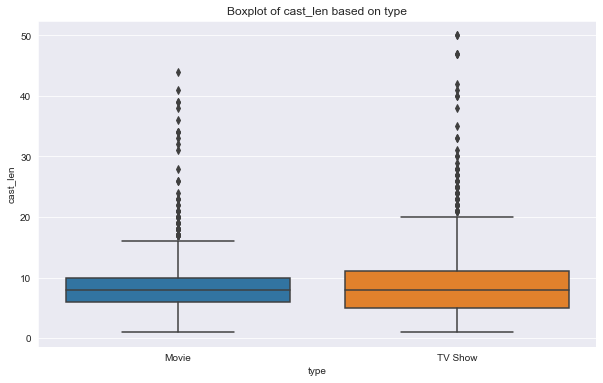

In [339]:
# Looking at the cast length

plot_boxplot(df,'type','cast_len')

* We can see that the cast length field has quite a lot of outliers acrorss both the content types

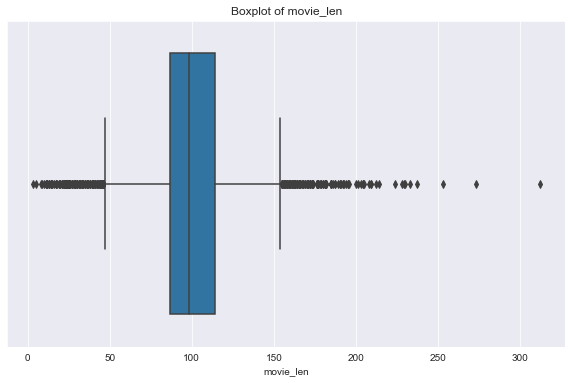

In [353]:
# Looking at num of countries

plot_boxplot(df, 'movie_len')

* The movie length too has quite a lot of outliers, on both sides of the plot

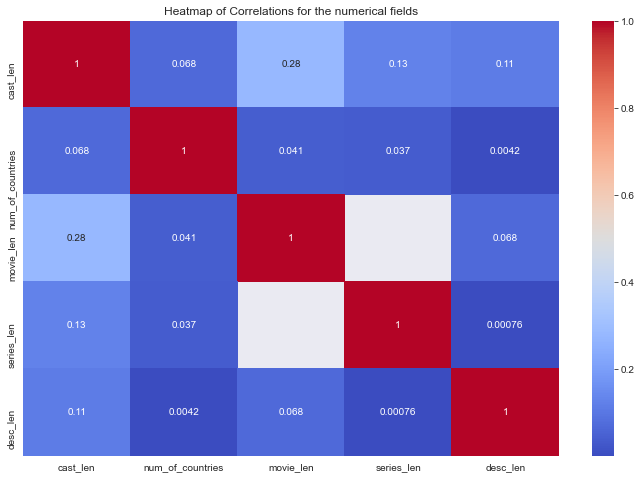

In [361]:
# Checking for any correlation between the numerical fields

plt.figure(figsize=(12,8))
sns.heatmap(df[['cast_len','num_of_countries','movie_len','series_len','desc_len']].corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlations for the numerical fields')
plt.show()

* We see that there is no significant correlation between the numerical features

In [403]:
# Adding a features that is # of days since today's date
# This feature can be really help determine how relevant two films are. If a person watches a movie from 2020 (say),
# there is a good chance that they may want to watch another movie that is recent and in the same time frame

df['today'] = datetime.datetime.today().date()

df['today'] = pd.to_datetime(df['today'])

df['day_since_added'] = df['today'] - df['date_added']

# Only extracting the number of days
df['day_since_added'] = df['day_since_added'].dt.days

df['day_since_added'].head() 

0    602.0
1    603.0
2    603.0
3    603.0
4    603.0
Name: day_since_added, dtype: float64

## Data Pre-Processing
Columns such as <b>director,cast, listed_in</b> and <b>country</b> are present in a nested format in the data. It would be useful to un-nest this data with the help of "explode"

In [371]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_len,num_of_countries,movie_len,series_len,desc_len,year_added,month_added,day_added,quarter_added,day_of_week_added,is_weekend
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN,27,2021.0,September,25.0,3.0,Saturday,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,NaN,NaN,1.0,27,2021.0,September,24.0,3.0,Friday,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,1.0,24,2021.0,September,24.0,3.0,Friday,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8.0,1.0,NaN,2.0,24,2021.0,September,24.0,3.0,Friday,0


In [459]:
def unnest_column(df, col_to_unnest):
    
    """
    The function takes in the dataframe along with the column that requires exploding
    and returns an exploded dataframe
    """    
    # Splitting the contents of the series followed by exploding the column
    
    df[col_to_unnest] = df[col_to_unnest].str.split(',')
    
    unnested_df = df.explode(col_to_unnest)
    
    # Stripping any additional space that the string may contain
    unnested_df[col_to_unnest] = unnested_df[col_to_unnest].str.strip()
    
    return unnested_df

In [473]:
# To do this, we can start by creating 4 different dataframes such that each dataframe has unique values for that column against some sort of identifier

# Eg. Title vs Director

director_df = df[['title','director']].copy()

director_df = unnest_column(director_df, 'director')

# Filling blank with 'dir_missing'
director_df['director'] = director_df['director'].fillna('dir_missing')

director_df

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,dir_missing
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,dir_missing
4,Kota Factory,dir_missing
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,dir_missing
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [474]:
# Repeating the same for cast

cast_df = df[['title','cast']]

cast_df = unnest_column(cast_df, 'cast')

# Filling blank with 'cast_missing'
cast_df['cast'] = cast_df['cast'].fillna('cast_missing')

cast_df

,title,cast
0,Dick Johnson Is Dead,cast_missing
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
...,...,...
8806,Zubaan,Manish Chaudhary
8806,Zubaan,Meghna Malik
8806,Zubaan,Malkeet Rauni
8806,Zubaan,Anita Shabdish


In [476]:
# Repeating the same for country

country_df = df[['title','country']]

country_df = unnest_column(country_df, 'country')

# Filling blank with 'cast_missing'
country_df['country'] = country_df['country'].fillna('country_missing')

country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,country_missing
3,Jailbirds New Orleans,country_missing
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,country_missing
8804,Zombieland,United States
8805,Zoom,United States


In [477]:
# Finally, repeating the same for the listed_in column

genre_df = df[['title','listed_in']]

genre_df = unnest_column(genre_df, 'listed_in')

# Filling blank with 'cast_missing'
genre_df['listed_in'] = genre_df['listed_in'].fillna('genre_missing')

genre_df

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
...,...,...
8805,Zoom,Children & Family Movies
8805,Zoom,Comedies
8806,Zubaan,Dramas
8806,Zubaan,International Movies


In [493]:
# Finally, now that we have these 4 dataframes, we can join these on the title column

# Joining director df and cast on title using an inner join as the movies across the dataframes would always exists

unnested_df = pd.merge(left=director_df, right=cast_df, how='inner', on='title')

# Joining the result of the above operation with the country_df

unnested_df = pd.merge(left=unnested_df, right=country_df, how='inner', on='title')

# Joining the result of the above operation with the genre_df

unnested_df = pd.merge(left=unnested_df, right=genre_df, how='inner', on='title')

In [489]:
# Looking at the unnested data

unnested_df.shape

(202065, 5)

In [496]:
unnested_df

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,cast_missing,United States,Documentaries
1,Blood & Water,dir_missing,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,dir_missing,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,dir_missing,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,dir_missing,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [497]:
# Checking if any dupes exist

unnested_df.drop_duplicates().shape

(202010, 5)

* We see that the resultant dataframe after un-nesting has over 200k rows
* As expected, the dataframe does not contain any duplicates

<b>Q</b> *What directors have made movies across most genres?*

In [509]:
# Based on the above result, we can find out what director has the most diverse movies i.e. which director has most genre listing

diverese_dirs = unnested_df.groupby(by=['director']).nunique()['listed_in'].reset_index().sort_values(by='listed_in', ascending=False).copy()

# Removing 'dir_missing'
diverese_dirs[diverese_dirs['director'] != 'dir_missing']

,director,listed_in
403,Anurag Kashyap,9
2945,Martin Scorsese,9
4820,Vishal Bhardwaj,8
1784,Ifa Isfansyah,8
34,Abhishek Chaubey,8
...,...,...
3340,Nick Gomez,1
3337,Nick Cassavetes,1
3335,Nicholaus Goossen,1
1189,Dhruv Dhawan,1


In [513]:
# looking at Anurag Kashyap's movie

unnested_df[unnested_df['director'] == 'Anurag Kashyap']['listed_in'].unique()

array(['Dramas', 'International Movies', 'Thrillers', 'Horror Movies',
       'Crime TV Shows', 'International TV Shows', 'TV Dramas',
       'Romantic Movies', 'Comedies'], dtype=object)

* This tells us that directors like 'Anurag Kashyap', 'Martin Scorsese' have movies across a lot of genres

In [514]:
unnested_df[['title','country']]

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Blood & Water,South Africa
3,Blood & Water,South Africa
4,Blood & Water,South Africa
...,...,...
202060,Zubaan,India
202061,Zubaan,India
202062,Zubaan,India
202063,Zubaan,India


In [519]:
unnested_df.groupby(by=['director','cast']).nunique()['title'].reset_index()

,director,cast,title
0,A. L. Vijay,G.V. Prakash Kumar,1
1,A. L. Vijay,Hema,1
2,A. L. Vijay,Joy Mathew,1
3,A. L. Vijay,Munishkanth,1
4,A. L. Vijay,Murli Sharma,1
...,...,...,...
62736,Şenol Sönmez,Seda Güven,1
62737,Şenol Sönmez,Somer Karvan,1
62738,Şenol Sönmez,Yosi Mizrahi,1
62739,Şenol Sönmez,Zerrin Sümer,1


<b>Q</b> *What are the most common countries in the dataset?*

In [527]:
# Excluding the missing countries

unnested_df[unnested_df['country']!='country_missing'].groupby(by='country').nunique()['title'].sort_values(ascending=False)

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Panama               1
Cyprus               1
Cuba                 1
Paraguay             1
Liechtenstein        1
Name: title, Length: 123, dtype: int64

* We see that the top 5 most occuring countries in the dataset are the US, India, UK, Canada and France

In [530]:
# Similarly, we can also find out the most common genre

unnested_df[unnested_df['listed_in']!='genre_missing'].groupby(by='listed_in').nunique()['title'].sort_values(ascending=False)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

* We see that the top 5 most occuring genres in the dataset are the International Movies, Dramas, Comedies, International TV Shows and Documentaries

<b>Q</b> *What is the most common director-actor combo?*

In [536]:
# Removing the missing directors and cast members
actor_dir_df = unnested_df[(unnested_df['director'] != 'dir_missing') & (unnested_df['cast'] != 'cast_missing')].copy()

actor_dir_df = actor_dir_df.groupby(by=['director','cast']).nunique()['title'].sort_values(ascending=False).reset_index()

In [539]:
actor_dir_df.head(10)

,director,cast,title
0,Rajiv Chilaka,Rajesh Kava,19
1,Rajiv Chilaka,Julie Tejwani,19
2,Rajiv Chilaka,Rupa Bhimani,18
3,Rajiv Chilaka,Jigna Bhardwaj,18
4,Rajiv Chilaka,Vatsal Dubey,16
5,Rajiv Chilaka,Mousam,13
6,Rajiv Chilaka,Swapnil,13
7,Suhas Kadav,Saurav Chakraborty,8
8,S.S. Rajamouli,Nassar,7
9,Yılmaz Erdoğan,Yılmaz Erdoğan,7


In [545]:
# looking at one such example

df[(df['director'] == 'Rajiv Chilaka') & df['cast'].str.contains('Rajesh')]['title'].unique()

array(['Chhota Bheem - Neeli Pahaadi', 'Chhota Bheem & Ganesh',
       'Chhota Bheem & Krishna: Mayanagari',
       'Chhota Bheem & Krishna: Pataliputra- City of the Dead',
       'Chhota Bheem And The Broken Amulet',
       'Chhota Bheem And The Crown of Valhalla',
       'Chhota Bheem and the Incan Adventure',
       'Chhota Bheem and The ShiNobi Secret', 'Chhota Bheem Aur Hanuman',
       'Chhota Bheem aur Krishna', 'Chhota Bheem aur Krishna vs Zimbara',
       'Chhota Bheem: Bheem vs Aliens',
       'Chhota Bheem: Dholakpur to Kathmandu',
       'Chhota Bheem: Journey to Petra',
       'Chhota Bheem: Master of Shaolin',
       'Chhota Bheem: The Rise of Kirmada',
       'Chhota Bheem and the Curse of Damyaan'], dtype=object)

In [552]:
# Similarly, we can find out what directors and their contribution towards differnt genres

unnested_df[unnested_df['director'] != 'dir_missing'].groupby(by=['director','listed_in']).nunique()['title'].sort_values(ascending=False).reset_index()

,director,listed_in,title
0,Rajiv Chilaka,Children & Family Movies,22
1,Jan Suter,Stand-Up Comedy,21
2,Raúl Campos,Stand-Up Comedy,19
3,Suhas Kadav,Children & Family Movies,16
4,Marcus Raboy,Stand-Up Comedy,15
...,...,...,...
12088,Nacho G. Velilla,Comedies,1
12089,Nabil Ayouch,International Movies,1
12090,Nabil Ayouch,Independent Movies,1
12091,Nabil Ayouch,Dramas,1


## Using the unnested data and combining it with the original data

In [556]:
# Joining the orignal dataframe with the unnested data

df_unnested = pd.merge(df, unnested_df, how='inner', on='title')

In [559]:
df_unnested.columns

Index(['show_id', 'type', 'title', 'director_x', 'cast_x', 'country_x',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in_x',
       'description', 'cast_len', 'num_of_countries', 'movie_len',
       'series_len', 'desc_len', 'year_added', 'month_added', 'day_added',
       'quarter_added', 'day_of_week_added', 'is_weekend', 'today',
       'day_since_added', 'director_y', 'cast_y', 'country_y', 'listed_in_y'],
      dtype='object')

In [572]:
# Removing all columns with _x prefix as these are the nested cols

df_unnested.drop([col for col in df_unnested.columns if '_x' in col], axis=1, inplace=True)

# Renaming columns with _y to remove the _y
df_unnested.columns = ['_'.join(col.split('_')[:-1]) if '_y' in col else col for col in df_unnested.columns]

df_unnested.head()

,show_id,type,title,date_added,release,rating,duration,description,cast_len,num_of_countries,movie_len,series_len,desc_len,year_added,month_added,day_added,quarter_added,day_of_week_added,is_weekend,today,day_since_added,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,1.0,90.0,NaN,27,2021.0,September,25.0,3.0,Saturday,1,2023-05-20,602.0,Kirsten Johnson,cast_missing,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0,2023-05-20,603.0,dir_missing,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0,2023-05-20,603.0,dir_missing,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0,2023-05-20,603.0,dir_missing,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",19.0,1.0,NaN,2.0,27,2021.0,September,24.0,3.0,Friday,0,2023-05-20,603.0,dir_missing,Khosi Ngema,South Africa,International TV Shows


# Recommendations
Based on all observations and take-aways from the above analysis, the following recommendations would be helpful for expanding the business further:
* We have seen that the focus of the platform so far has heavily been towards releasing movies. While TV Shows have seen some attention too, it may be nice for the business to focus on adding more TV Shows (if possible).
* Continuing on the lines of TV Shows, we have seen that the average number of seasons for TV Shows is only 1. People often tend to get emotionally invested in TV Shows and it would make sense to make sure that TV Shows go past more than one season.
* While the month for releasing a Movie/TV Show doesn't seem to matter much, we have seen that most Movies/TV Shows are launched on a Friday. It would be best for the business to continue launching content on Fridays or the weekends as people can relax and enjoy the new content on the platform.
* We see a dip in the addition of movies/series towards 2020 (because of Covid), however, if the business were to add content, it would receive a lot of attention due to lockdowns having people work from home.
* We have seen that most movies air for roughly 98 minutes, however this number varies based on the type of Rating for the movie. Regardless, this tells us that 1.5 hours could be the sweet spot for movies as anything under could feel too shprt and anything over that could feel lengthy. Thus, the platform should look to air more movies that are medium in terms of duration.
* We have seen that the most movies are produced by US, India, UK, Canada and France. It would make a lot of sense to ramp up the advertising and marketing in these countries as they should have a bigger market and this would thus lead to greater profits in the long run.
* Most common genres are International Movies, Dramas, Comedies, International TV Shows and Documentaries. The platform can focus on releasing more content within these genres as they are tried and tested.
* Most movies/TV Shows are tied to a single country. If there could be more countries tied a movie/show (based on cast and other factors), it would help make the content more diverse and would help with making the content more accessible to a wider set of audience,thus driving sales.
* In continuation of the above point, it is important to make sure that movies have subtitles available in various languages. This would enable a larger set of audience to view certain content.
* Currently, most content available has ratings - 'TV-MA' and 'TV-14'. There still are a lot of other types of ratings that don't have as much content. The platform can also focus on adding some more content in the other rating sub-categories in order to make sure that all types of crowd can enjoy a wide set of content across various ratings.